## Basic Imports

In [1]:
## Necessary Imports
from fastai.imports import *
from fastai.structured import *
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
color = sns.color_palette()

In [2]:
import re

In [2]:
PATH = "kaggle\\case\\"

In [3]:
!dir {PATH}

 Volume in drive D is Local Disk
 Volume Serial Number is B408-A348

 Directory of D:\Github\fastai\courses\ml1\kaggle\case

03-Feb-18  09:54 AM    <DIR>          .
03-Feb-18  09:54 AM    <DIR>          ..
01-Feb-18  07:18 PM    <DIR>          .ipynb_checkpoints
03-Feb-18  09:54 AM            32,890 2000.png
03-Feb-18  09:54 AM            32,912 2010.png
03-Feb-18  09:54 AM            22,215 2017.png
28-Jan-18  11:46 PM        21,059,832 Housing_Resale.xlsx
24-Jan-18  11:08 PM            14,379 Housing_Resale_Questions.docx
03-Feb-18  07:18 AM            10,594 Housing_Resale_tables.xlsx
01-Feb-18  06:54 PM        13,243,906 main_validation.csv
01-Feb-18  02:33 PM        96,500,645 modelling_data.csv
29-Jan-18  10:49 PM        55,825,324 train.csv
01-Feb-18  07:09 PM        84,385,072 training_data.csv
02-Feb-18  12:01 AM           117,412 weights
              11 File(s)    271,245,181 bytes
               3 Dir(s)  187,587,559,424 bytes free


In [4]:
df_raw = pd.read_csv(f'{PATH}training_data.csv')

In [5]:
df_raw.columns

Index(['Unnamed: 0', 'temp', 'month', 'town', 'flat_type', 'block',
       'street_name', 'storey_range', 'floor_area_sqm', 'flat_model',
       'lease_commence_date', 'resale_price', 'building_id', 'year', 'age',
       'no_resold', 'no_times_resold'],
      dtype='object')

In [6]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393287 entries, 0 to 393286
Data columns (total 17 columns):
Unnamed: 0             393287 non-null int64
temp                   393287 non-null object
month                  393287 non-null object
town                   393287 non-null object
flat_type              393287 non-null object
block                  393287 non-null object
street_name            393287 non-null object
storey_range           393287 non-null object
floor_area_sqm         393287 non-null float64
flat_model             393287 non-null object
lease_commence_date    393287 non-null float64
resale_price           393287 non-null float64
building_id            393287 non-null object
year                   393287 non-null float64
age                    393287 non-null float64
no_resold              393287 non-null int64
no_times_resold        393287 non-null int64
dtypes: float64(5), int64(3), object(9)
memory usage: 51.0+ MB


In [8]:
df_raw.describe(include='all')

,year,month,flat_type,Unnamed: 3,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,Age
count,477833.000000,477833.00000,477833.0,442054,477833,477833,477833.000000,477833,477833.000000,4.778330e+05,0.0
unique,NaN,NaN,7.0,1,534,25,NaN,20,NaN,NaN,NaN
top,NaN,NaN,4.0,ROOM,YISHUN RING RD,04 TO 06,NaN,Model A,NaN,NaN,NaN
freq,NaN,NaN,185387.0,442054,8171,119924,NaN,137439,NaN,NaN,NaN
mean,2007.352200,6.53927,NaN,NaN,NaN,NaN,96.616555,NaN,1988.562422,3.194007e+05,NaN
std,5.043029,3.38208,NaN,NaN,NaN,NaN,25.364864,NaN,9.576672,1.366493e+05,NaN
min,2000.000000,1.00000,NaN,NaN,NaN,NaN,28.000000,NaN,1966.000000,2.800000e+04,NaN
25%,2003.000000,4.00000,NaN,NaN,NaN,NaN,73.000000,NaN,1982.000000,2.160000e+05,NaN
50%,2007.000000,7.00000,NaN,NaN,NaN,NaN,99.000000,NaN,1987.000000,3.000000e+05,NaN
75%,2011.000000,9.00000,NaN,NaN,NaN,NaN,114.000000,NaN,1997.000000,3.999990e+05,NaN


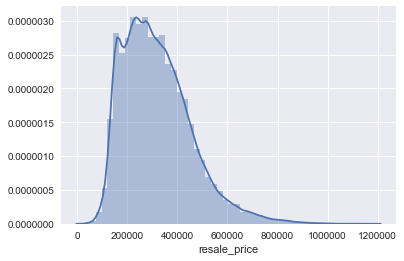

In [9]:
## Get A Quick Overview of What We Are Dealing With
sns.distplot(df_raw['resale_price']);

In [10]:
#skewness and kurtosis is Clearly Visible via this
print("Skewness: %f" % df_raw['resale_price'].skew())
print("Kurtosis: %f" % df_raw['resale_price'].kurt())

Skewness: 0.950600
Kurtosis: 1.252723


In [11]:
df_raw['resale_price'].describe()

count    4.778330e+05
mean     3.194007e+05
std      1.366493e+05
min      2.800000e+04
25%      2.160000e+05
50%      3.000000e+05
75%      3.999990e+05
max      1.180000e+06
Name: resale_price, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


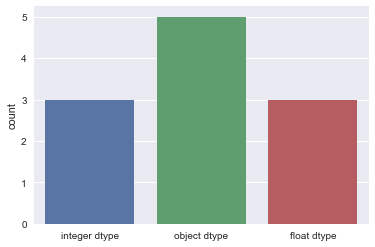

In [12]:
def disply_dtype_plot(df = None):
    if df is None:
        return
    l = []
    cols = df.columns
    for i in cols:
        if df[i].dtype == 'int64':
            l.append('integer dtype')
        elif df[i].dtype == 'object':
            l.append('object dtype')
        elif df[i].dtype == 'float64':
            l.append('float dtype')
        else:
            pass
    sns.countplot(l)
    del l
disply_dtype_plot(df_raw)

In [9]:
df_raw.head(0)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,age,no_resold


In [8]:
df_raw.drop(['Unnamed: 0','temp','building_id','no_times_resold'], inplace=True, axis=1)

In [16]:
df_raw["Age"] = df_raw['year'] - df_raw['lease_commence_date']

## Re

In [58]:
df_raw.tail(n=10)

,year,month,flat_type,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,Age
477823,2017,11,5,YISHUN ST 21,10 TO 12,121.0,Improved,1985,480000.0,32
477824,2017,11,5,YISHUN ST 81,04 TO 06,122.0,Improved,1988,490000.0,29
477825,2017,11,5,YISHUN ST 81,07 TO 09,122.0,Improved,1988,548000.0,29
477826,2017,11,EXECUTIVE,YISHUN AVE 6,01 TO 03,142.0,Apartment,1988,465000.0,29
477827,2017,11,EXECUTIVE,YISHUN ST 61,01 TO 03,142.0,Apartment,1987,515000.0,30
477828,2017,11,EXECUTIVE,YISHUN ST 61,10 TO 12,164.0,Apartment,1992,728000.0,25
477829,2017,11,EXECUTIVE,YISHUN ST 81,01 TO 03,154.0,Maisonette,1987,648888.0,30
477830,2017,11,EXECUTIVE,YISHUN ST 81,07 TO 09,142.0,Apartment,1988,658000.0,29
477831,2017,11,EXECUTIVE,YISHUN ST 81,04 TO 06,142.0,Apartment,1987,598000.0,30
477832,2017,11,MULTI-GENERATION,YISHUN AVE 4,01 TO 03,179.0,Multi Generation,1987,695000.0,30


In [15]:
month_non_split = list(df_raw['month'])

In [19]:
s = re.split('-','2000-01');print(s[0]);print(s[1])

2000
01


In [20]:
year = []
mon = []
for i in month_non_split:
    year.append(re.split('-', i)[0])
    mon.append(re.split('-', i)[1])

In [24]:
df_raw.drop(['month'],axis =1,inplace=True)

In [25]:
df_raw['month'] = mon
df_raw['year'] = year

In [26]:
df_raw.columns

Index(['town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'month', 'year'],
      dtype='object')

In [27]:
df_raw.head()

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,month,year
0,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0,01,2000
1,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,167000.0,01,2000
2,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,163000.0,01,2000
3,ANG MO KIO,4 ROOM,304,ANG MO KIO AVE 1,04 TO 06,97.0,New Generation,1977,260000.0,01,2000
4,ANG MO KIO,5 ROOM,221,ANG MO KIO AVE 1,10 TO 12,127.0,Improved,1993,408000.0,01,2000


## Plots

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


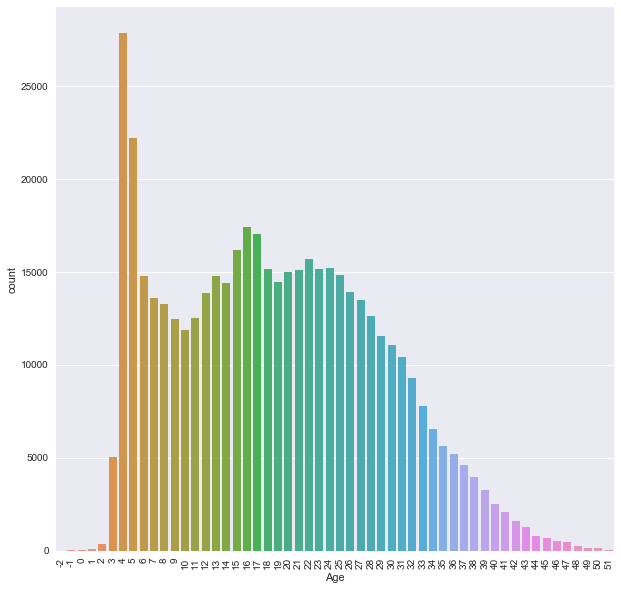

In [27]:
var = 'Age'
plt.figure(figsize=(10,10))
plt.xticks(rotation = 90)
sns.countplot(df_raw[var])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


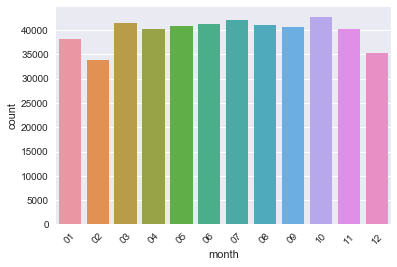

In [58]:
var = 'month'
plt.xticks(rotation = 45)
sns.countplot(df_raw.month)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


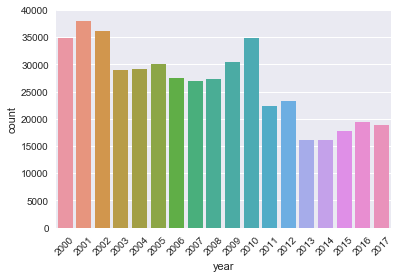

In [59]:
plt.xticks(rotation = 45)
sns.countplot(df_raw.year)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


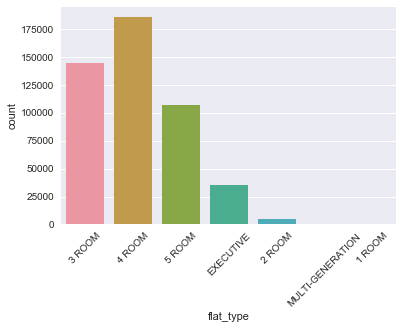

In [33]:
var = 'flat_type'
plt.xticks(rotation = 45)
sns.countplot(df_raw.flat_type)

In [43]:
from collections import Counter
Counter(df_raw['street_name'])

Counter({'ADMIRALTY DR': 1763,
         'ADMIRALTY LINK': 1062,
         'AH HOOD RD': 75,
         'ALJUNIED CRES': 1164,
         'ALJUNIED RD': 70,
         'ANCHORVALE DR': 699,
         'ANCHORVALE LANE': 298,
         'ANCHORVALE LINK': 1253,
         'ANCHORVALE RD': 1085,
         'ANG MO KIO AVE 1': 2085,
         'ANG MO KIO AVE 10': 6656,
         'ANG MO KIO AVE 2': 107,
         'ANG MO KIO AVE 3': 5830,
         'ANG MO KIO AVE 4': 3651,
         'ANG MO KIO AVE 5': 3108,
         'ANG MO KIO AVE 6': 1236,
         'ANG MO KIO AVE 8': 880,
         'ANG MO KIO AVE 9': 395,
         'ANG MO KIO ST 11': 77,
         'ANG MO KIO ST 21': 90,
         'ANG MO KIO ST 31': 235,
         'ANG MO KIO ST 32': 369,
         'ANG MO KIO ST 52': 299,
         'BAIN ST': 90,
         'BALAM RD': 1049,
         'BANGKIT RD': 1003,
         'BEACH RD': 330,
         'BEDOK CTRL': 168,
         'BEDOK NTH AVE 1': 1123,
         'BEDOK NTH AVE 2': 1099,
         'BEDOK NTH AVE 3': 1010,
  

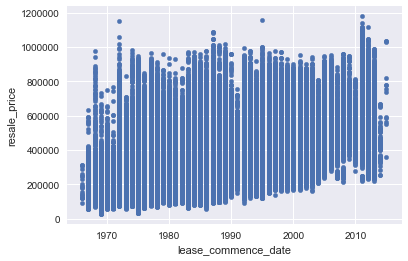

In [47]:
var = 'lease_commence_date'
data = pd.concat([df_raw['resale_price'], df_raw[var]], axis=1)
data.plot.scatter(x=var, y='resale_price')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


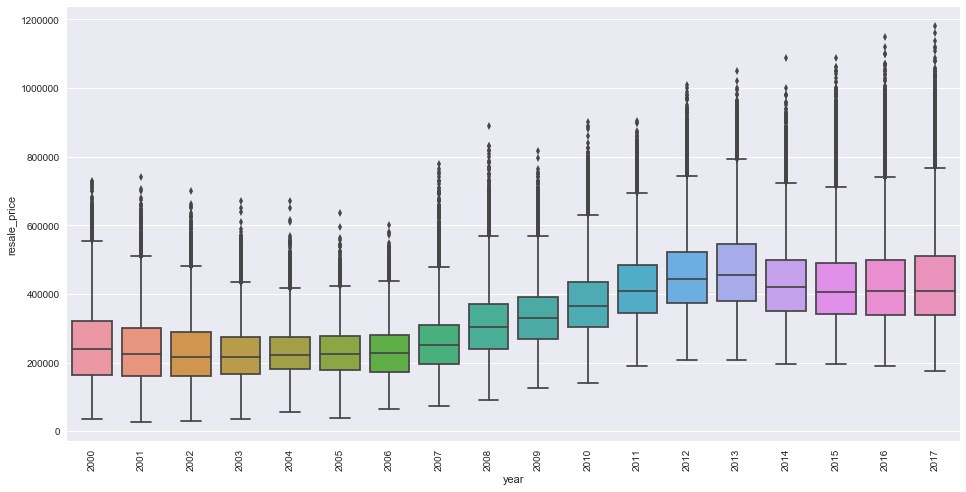

In [48]:
var = 'year'
data = pd.concat([df_raw['resale_price'], df_raw[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="resale_price", data=data)
plt.xticks(rotation=90);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


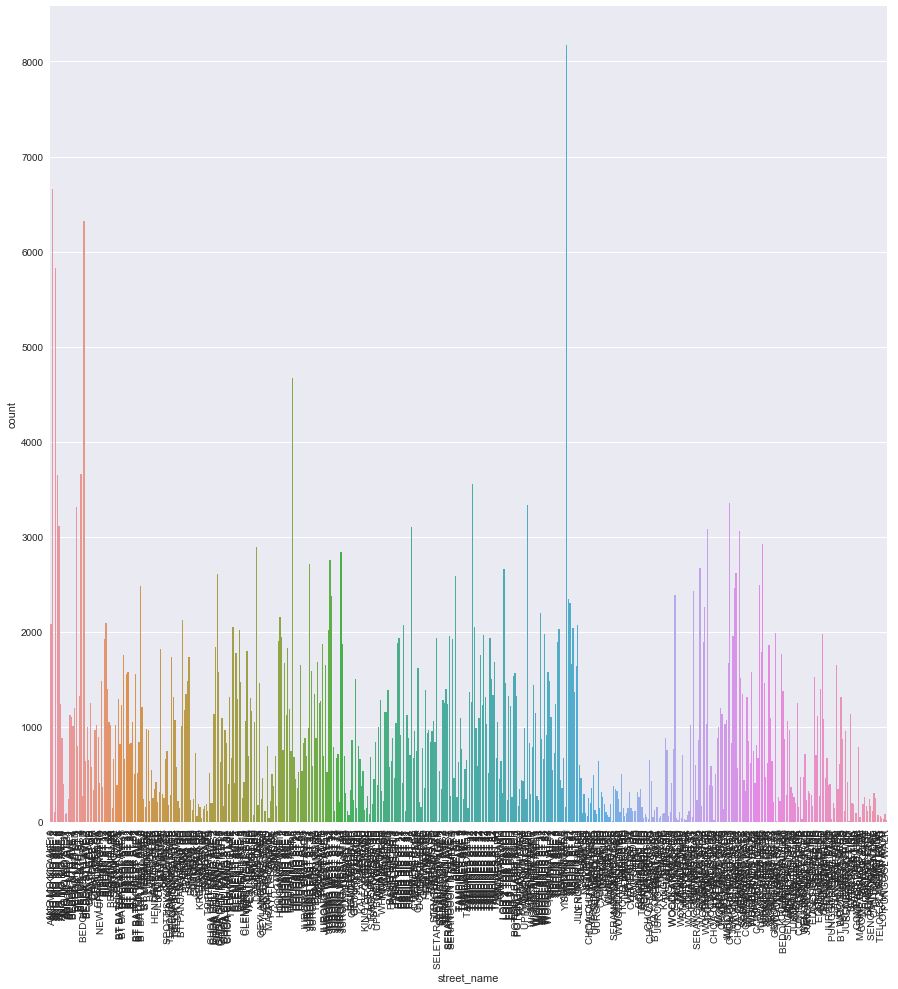

In [42]:
var = 'street_name'
plt.figure(figsize=(15,15))
plt.xticks(rotation = 90)
sns.countplot(df_raw[var])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


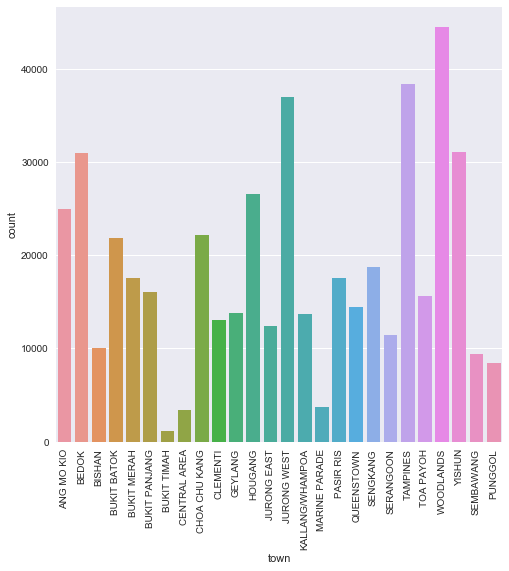

In [38]:
var = 'town'
plt.figure(figsize=(8,8))
plt.xticks(rotation = 90)
sns.countplot(df_raw[var])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


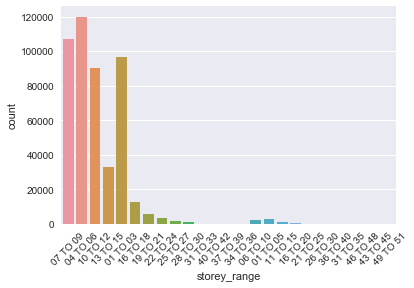

In [39]:
var = 'storey_range'
plt.xticks(rotation = 45)
sns.countplot(df_raw[var])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


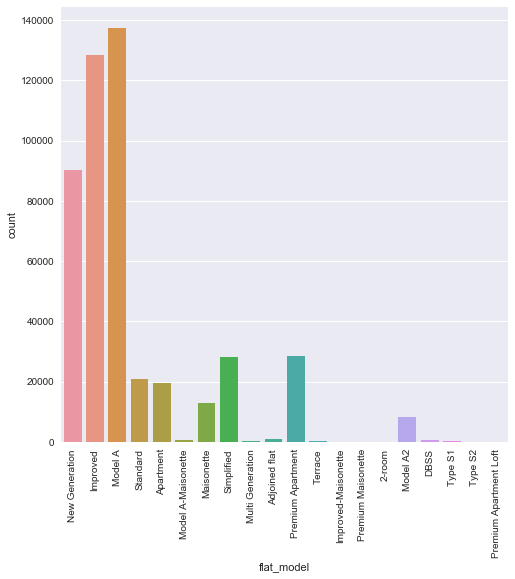

In [44]:
var = 'flat_model'
plt.figure(figsize=(8,8))
plt.xticks(rotation = 90)
sns.countplot(df_raw[var])

Here only few types are palying the role as such..
To name them they are NewGen,Improved,ModelA,Standard,Apart,Simplified,Premium,Maisonette rest we can remove them

## Unique values

In [64]:
train_cats(df_raw)
#it's a helper function to aotumate the boring stuffs..
# For Further Insights do a `shift+tab' or a `??train_cats`

In [65]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477833 entries, 0 to 477832
Data columns (total 11 columns):
town                   477833 non-null category
flat_type              477833 non-null category
block                  477833 non-null category
street_name            477833 non-null category
storey_range           477833 non-null category
floor_area_sqm         477833 non-null float64
flat_model             477833 non-null category
lease_commence_date    477833 non-null int64
resale_price           477833 non-null float64
month                  477833 non-null category
year                   477833 non-null category
dtypes: category(8), float64(2), int64(1)
memory usage: 15.6 MB


In [66]:
df_raw['month'].cat.codes

0          0
1          0
2          0
3          0
4          0
5          0
6          0
7          0
8          0
9          0
10         0
11         0
12         0
13         0
14         0
15         0
16         0
17         0
18         0
19         0
20         0
21         0
22         0
23         0
24         0
25         0
26         0
27         0
28         0
29         0
          ..
477803    10
477804    10
477805    10
477806    10
477807    10
477808    10
477809    10
477810    10
477811    10
477812    10
477813    10
477814    10
477815    10
477816    10
477817    10
477818    10
477819    10
477820    10
477821    10
477822    10
477823    10
477824    10
477825    10
477826    10
477827    10
477828    10
477829    10
477830    10
477831    10
477832    10
Length: 477833, dtype: int8

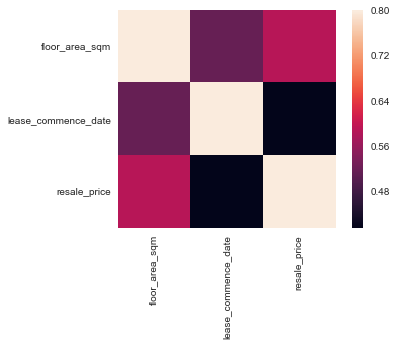

In [68]:
#correlation matrix
corrmat = df_raw.corr()
sns.heatmap(corrmat, vmax=.8, square=True);

## RF

In [10]:
df_raw.resale_price = np.log(df_raw.resale_price)

In [11]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)
    return(res)

In [14]:
train_cats(df_raw)

In [15]:
df, y, _ = proc_df(df_raw, 'resale_price')

In [16]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'year', 'age',
       'no_resold'],
      dtype='object')

In [17]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(df, y)
m.score(df,y)

0.99530658728560062

In [18]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 40000
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)
X_train.shape, y_train.shape, X_valid.shape

((353287, 12), (353287,), (40000, 12))

In [19]:
m = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
m.score(df,y)

0.77697789832166875

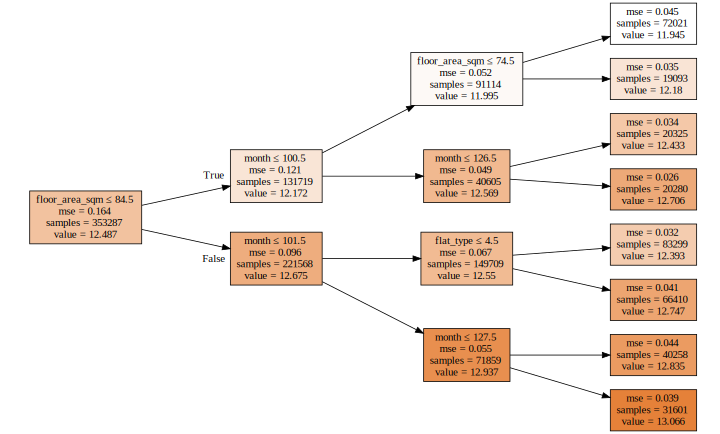

In [20]:
draw_tree(m.estimators_[0], X_train, precision=3)

In [21]:
fi = rf_feat_importance(m, df); fi[:10]

,cols,imp
6,floor_area_sqm,0.487445
0,month,0.408782
2,flat_type,0.103774
1,town,0.000000
3,block,0.000000
4,street_name,0.000000
5,storey_range,0.000000
7,flat_model,0.000000
8,lease_commence_date,0.000000
9,year,0.000000


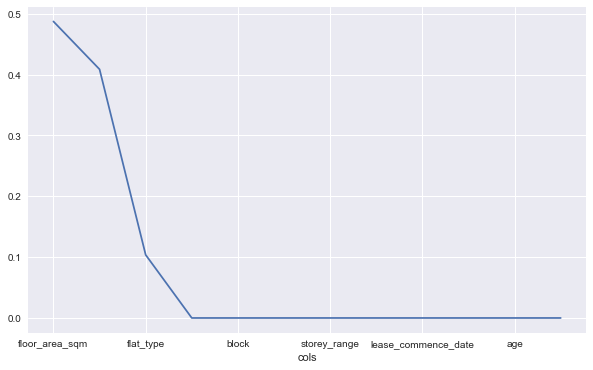

In [22]:
fi.plot('cols', 'imp', figsize=(10,6), legend=False);

In [23]:
def plot_fi(fi): 
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

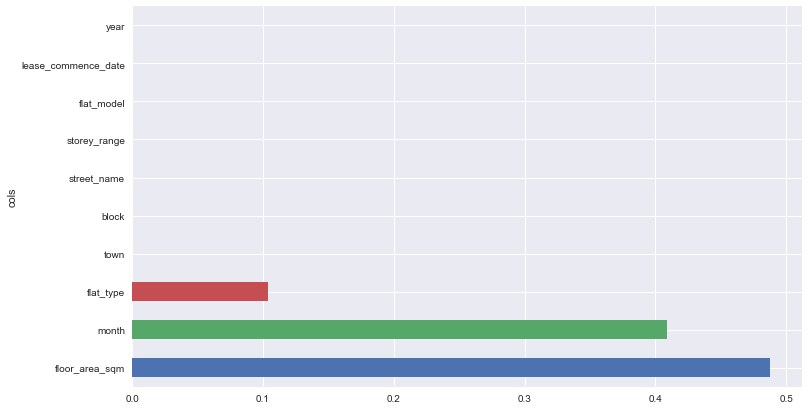

In [24]:
plot_fi(fi[:10]);

In [25]:
from scipy.cluster import hierarchy as hc

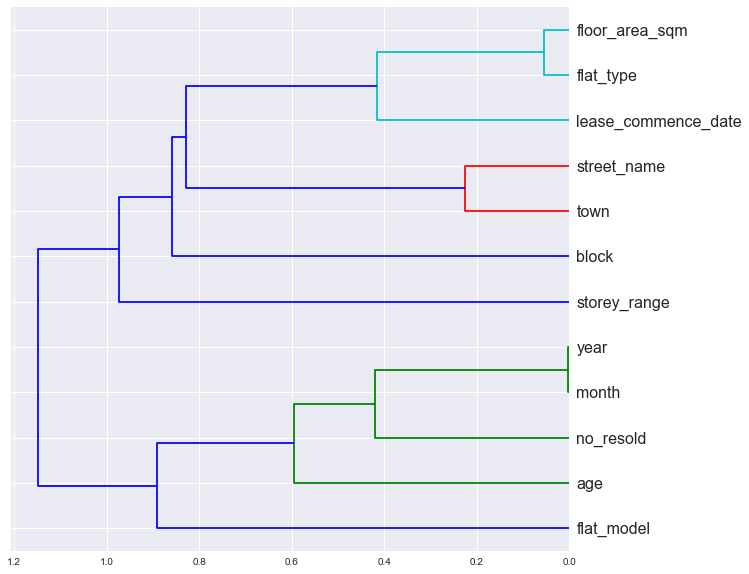

In [26]:
corr = np.round(scipy.stats.spearmanr(df).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(10,10))
dendrogram = hc.dendrogram(z, labels=df.columns, orientation='left', leaf_font_size=16)
plt.show()

## Partial Dependence

In [28]:
from pdpbox import pdp
from plotnine import *

In [29]:
set_rf_samples(10000)

In [30]:
df_trn2, y_trn, _ = proc_df(df_raw, 'resale_price', max_n_cat=20)
X_train, X_valid = split_vals(df_trn2, n_trn)
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.6, n_jobs=-1)
m.fit(X_train, y_train);

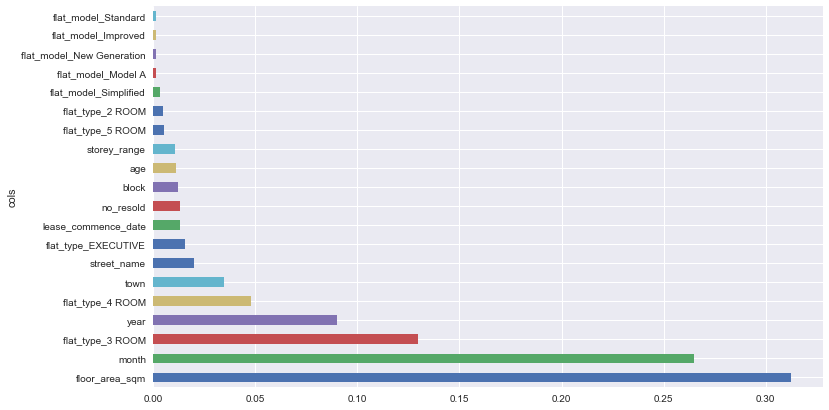

In [31]:
plot_fi(rf_feat_importance(m, df_trn2)[:20]);

In [32]:
x = get_sample(X_train, 500)

In [43]:
def plot_pdp(feat, clusters=None, feat_name=None):
    feat_name = feat_name or feat
    p = pdp.pdp_isolate(m, x, feat)
    return pdp.pdp_plot(p, feat_name, plot_lines=True, 
                        cluster=clusters is not None, n_cluster_centers=clusters)

In [48]:
df_raw.resale_price = np.exp(df_raw.resale_price)

In [49]:
x_all = get_sample(df_raw, 500)

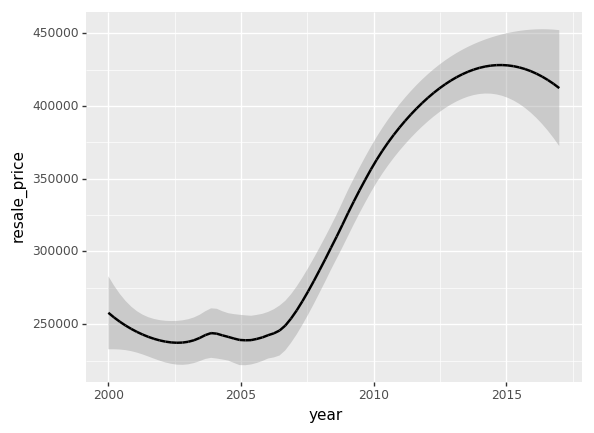

<ggplot: (91195899298)>

In [50]:
ggplot(x_all, aes('year', 'resale_price'))+stat_smooth(se=True, method='loess')

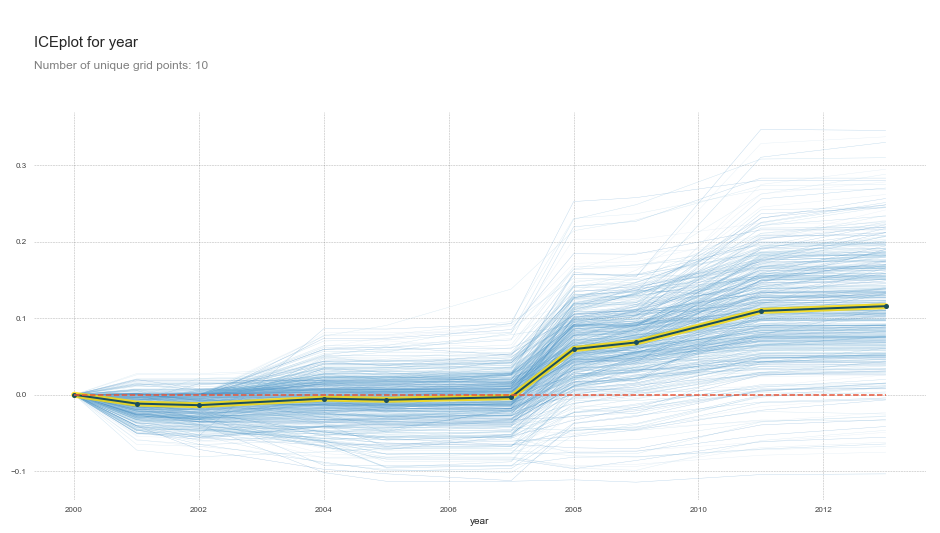

In [51]:
plot_pdp('year')

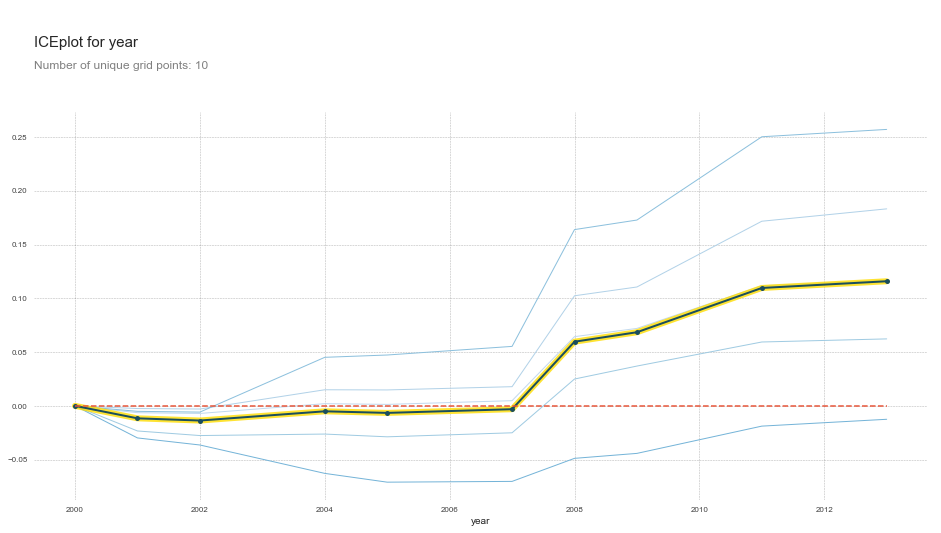

In [53]:
plot_pdp('year', clusters=5)

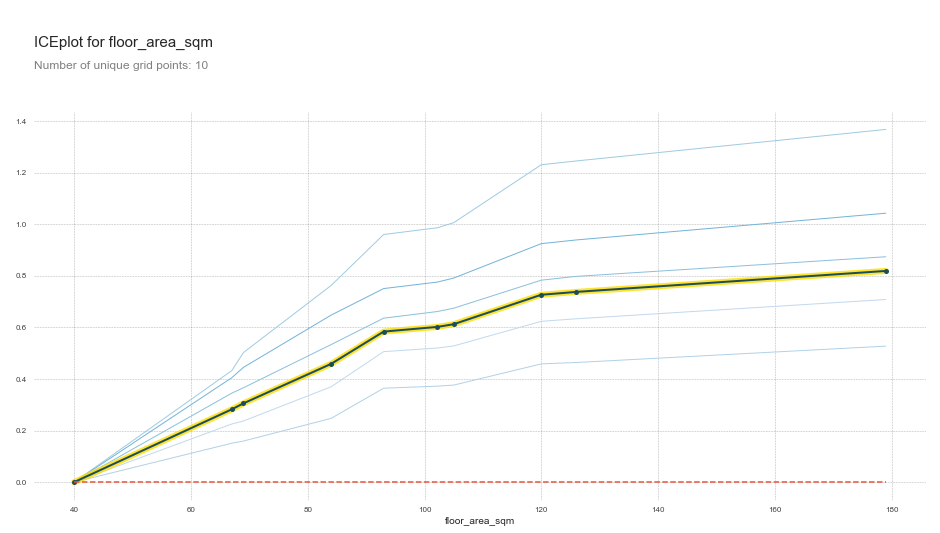

In [52]:
plot_pdp('floor_area_sqm', clusters=5)

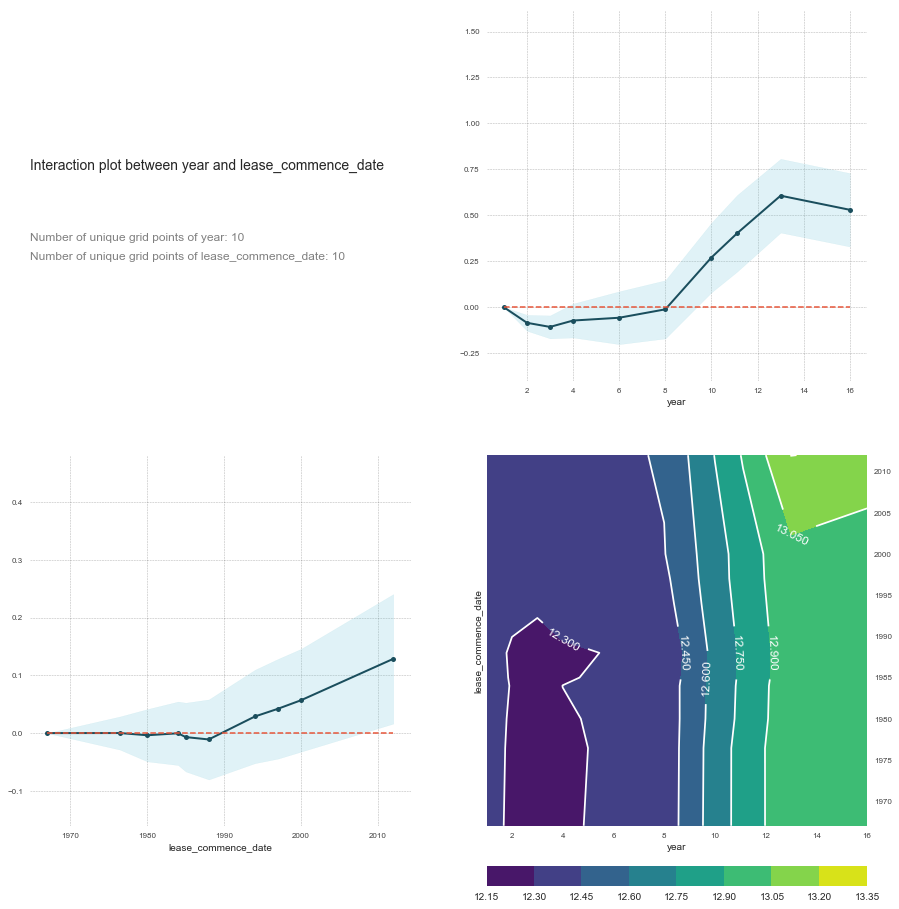

In [120]:
feats = ['year','lease_commence_date']
p = pdp.pdp_interact(m, x, feats)
pdp.pdp_interact_plot(p, feats)

## Tree Interpreter

In [121]:
from treeinterpreter import treeinterpreter as ti

In [124]:
fi = rf_feat_importance(m, x); fi[:15]

,cols,imp
8,year,0.427701
4,floor_area_sqm,0.289395
11,flat_type_3 ROOM,0.067152
12,flat_type_4 ROOM,0.041010
6,lease_commence_date,0.037875
0,town,0.037752
2,street_name,0.022137
1,block,0.020883
14,flat_type_EXECUTIVE,0.014993
5,flat_model,0.011436


In [125]:
feats=['flat_type_3 ROOM','flat_type_4 ROOM']

In [126]:
(X_train[feats]/1000).describe()

,flat_type_3 ROOM,flat_type_4 ROOM
count,437833.000000,437833.000000
mean,0.000307,0.000385
std,0.000461,0.000487
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.001000,0.001000
max,0.001000,0.001000


In [127]:
(X_valid[feats]/1000).describe()

,flat_type_3 ROOM,flat_type_4 ROOM
count,40000.000000,40000.000000
mean,0.000255,0.000415
std,0.000436,0.000493
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.001000,0.001000
max,0.001000,0.001000


In [128]:
x.drop(feats, axis=1, inplace=True)

## 29th Jan

In [37]:
from collections import Counter
z = Counter(df_raw['street_name'])

In [42]:
for k, v in z.items():
    print("%s: %s" % (k, v))

ANG MO KIO AVE 1: 2085
ANG MO KIO AVE 10: 6656
ANG MO KIO AVE 2: 107
ANG MO KIO AVE 3: 5830
ANG MO KIO AVE 4: 3651
ANG MO KIO AVE 5: 3108
ANG MO KIO AVE 6: 1236
ANG MO KIO AVE 8: 880
ANG MO KIO AVE 9: 395
ANG MO KIO ST 11: 77
ANG MO KIO ST 21: 90
ANG MO KIO ST 31: 235
BEDOK NTH AVE 1: 1123
BEDOK NTH AVE 2: 1099
BEDOK NTH AVE 3: 1010
BEDOK NTH AVE 4: 1197
BEDOK NTH RD: 3312
BEDOK NTH ST 1: 800
BEDOK NTH ST 2: 1322
BEDOK NTH ST 3: 3659
BEDOK NTH ST 4: 271
BEDOK RESERVOIR RD: 6326
BEDOK STH AVE 1: 637
BEDOK STH AVE 2: 996
BEDOK STH AVE 3: 648
BEDOK STH RD: 1254
CHAI CHEE AVE: 580
CHAI CHEE DR: 337
CHAI CHEE RD: 971
CHAI CHEE ST: 1021
JLN TENAGA: 889
LENGKONG TIGA: 409
NEW UPP CHANGI RD: 1486
BISHAN ST 11: 367
BISHAN ST 12: 1923
BISHAN ST 13: 2095
BISHAN ST 22: 1398
BISHAN ST 23: 1053
BISHAN ST 24: 1017
BRIGHT HILL DR: 142
SHUNFU RD: 658
SIN MING AVE: 1018
SIN MING RD: 389
BT BATOK CTRL: 1297
BT BATOK EAST AVE 3: 817
BT BATOK EAST AVE 4: 1234
BT BATOK EAST AVE 5: 1760
BT BATOK ST 11: 660
B

In [43]:
from collections import OrderedDict
z_sorted_by_value = OrderedDict(sorted(z.items(), key=lambda x: x[1], reverse= True))

In [77]:
df_count_street = pd.DataFrame(z_sorted_by_value, index = ['freq']);df_count_street = df_count_street.T;df_count_street

,freq
YISHUN RING RD,8171
ANG MO KIO AVE 10,6656
BEDOK RESERVOIR RD,6326
ANG MO KIO AVE 3,5830
HOUGANG AVE 8,4667
BEDOK NTH ST 3,3659
ANG MO KIO AVE 4,3651
TAMPINES ST 21,3554
WOODLANDS RING RD,3351
MARSILING DR,3336


In [28]:
df_raw

,year,month,flat_type,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,Age
0,2000,1,3,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0,24
1,2000,1,3,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,167000.0,24
2,2000,1,3,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,163000.0,24
3,2000,1,4,ANG MO KIO AVE 1,04 TO 06,97.0,New Generation,1977,260000.0,23
4,2000,1,5,ANG MO KIO AVE 1,10 TO 12,127.0,Improved,1993,408000.0,7
5,2000,1,4,ANG MO KIO AVE 1,07 TO 09,112.0,Model A,1993,315000.0,7
6,2000,1,3,ANG MO KIO AVE 1,04 TO 06,73.0,New Generation,1977,157000.0,23
7,2000,1,3,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1977,178000.0,23
8,2000,1,5,ANG MO KIO AVE 1,13 TO 15,123.0,Standard,1977,374000.0,23
9,2000,1,5,ANG MO KIO AVE 1,01 TO 03,123.0,Standard,1977,360000.0,23


## Bi Variate plots on train.csv

In [18]:
new_df = pd.read_csv(f'{PATH}train.csv')

In [19]:
new_df.head(1)

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,building_id,month,year,age,no_times_resold
0,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0,ANG MO KIO_216_ANG MO KIO AVE 1_07 TO 09_New G...,1,2000,24,33


In [20]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416761 entries, 0 to 416760
Data columns (total 14 columns):
town                   416761 non-null object
flat_type              416761 non-null object
block                  416761 non-null object
street_name            416761 non-null object
storey_range           416761 non-null object
floor_area_sqm         416761 non-null float64
flat_model             416761 non-null object
lease_commence_date    416761 non-null int64
resale_price           416761 non-null float64
building_id            416761 non-null object
month                  416761 non-null int64
year                   416761 non-null int64
age                    416761 non-null int64
no_times_resold        416761 non-null int64
dtypes: float64(2), int64(5), object(7)
memory usage: 44.5+ MB


In [20]:
new_df.head(1)

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,building_id,month,year,age,no_times_resold
0,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0,ANG MO KIO_216_ANG MO KIO AVE 1_07 TO 09_New G...,1,2000,24,33


Text(0,0.5,'price')

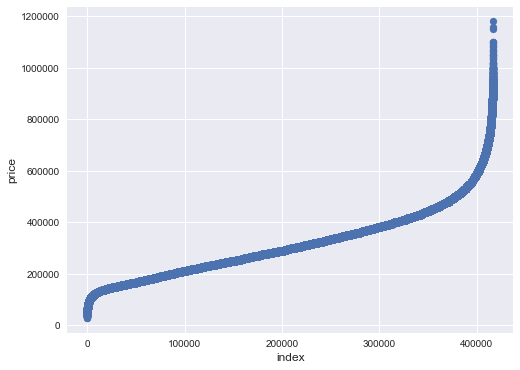

In [21]:
plt.figure(figsize=(8,6))
plt.scatter(range(new_df.shape[0]), np.sort(new_df.resale_price.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('price', fontsize=12)
##if needed, one can truncate the high values.

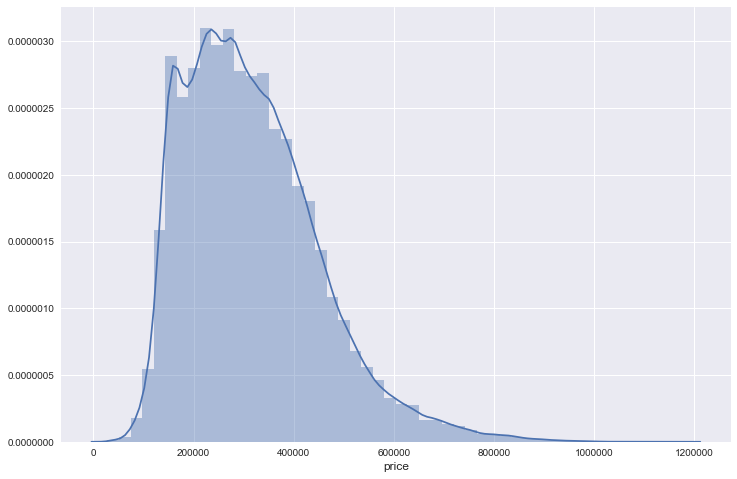

In [22]:
plt.figure(figsize=(12,8))
sns.distplot(new_df.resale_price.values, bins=50, kde=True)
plt.xlabel('price', fontsize=12)
plt.show()
#Certainly a long right tail.let us plot the log of resale_price variable.

Text(0.5,0,'price')

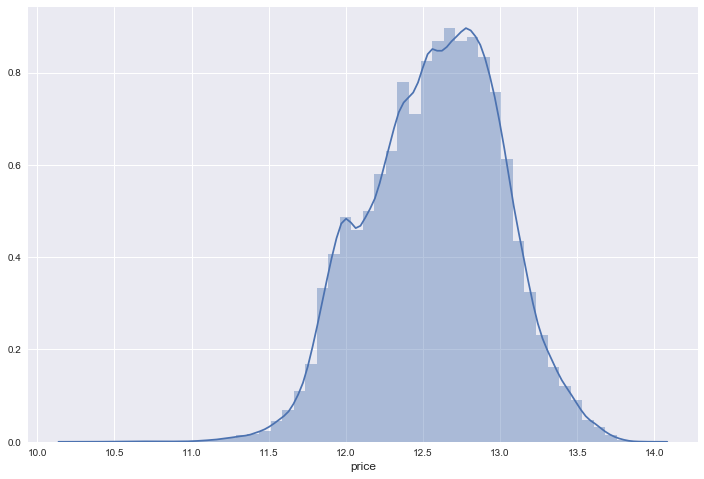

In [23]:
plt.figure(figsize=(12,8))
sns.distplot(np.log(new_df.resale_price.values), bins=50, kde=True)
plt.xlabel('price', fontsize=12)

Now let us see how the median housing price change with time.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17]),
 <a list of 18 Text xticklabel objects>)

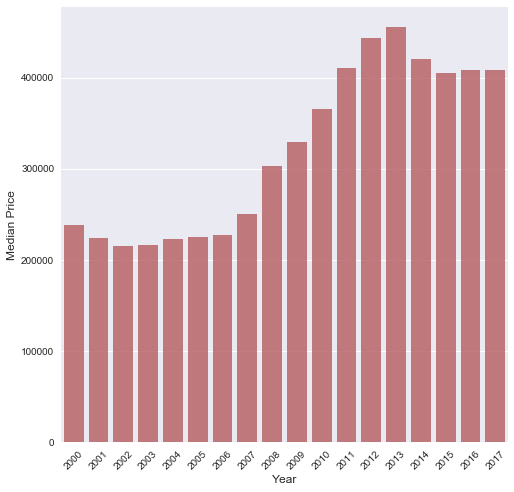

In [24]:
grouped_df = new_df.groupby('year')['resale_price'].aggregate(np.median).reset_index()
plt.figure(figsize=(8,8))
sns.barplot(grouped_df.year.values, grouped_df.resale_price.values, alpha=0.8, color=color[2])
plt.ylabel('Median Price', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.xticks(rotation=45)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

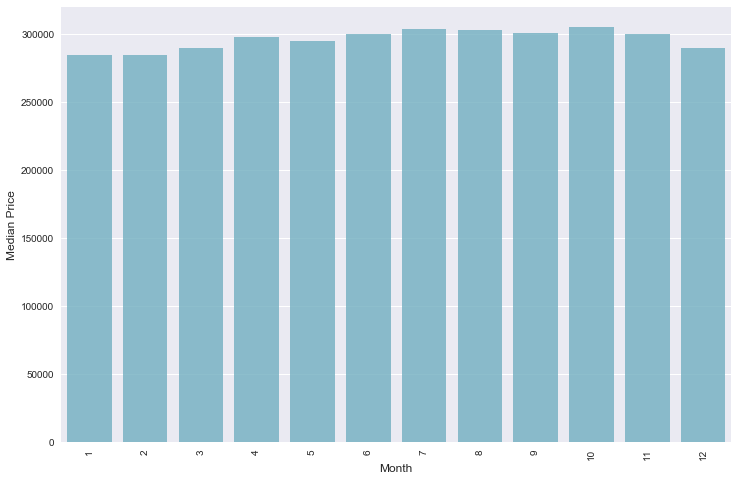

In [25]:
grouped_df = new_df.groupby('month')['resale_price'].aggregate(np.median).reset_index()
plt.figure(figsize=(12,8))
sns.barplot(grouped_df.month.values, grouped_df.resale_price.values, alpha=0.8, color=color[5])
plt.ylabel('Median Price', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.xticks(rotation='vertical')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
        26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76]),
 <a list of 77 Text xticklabel objects>)

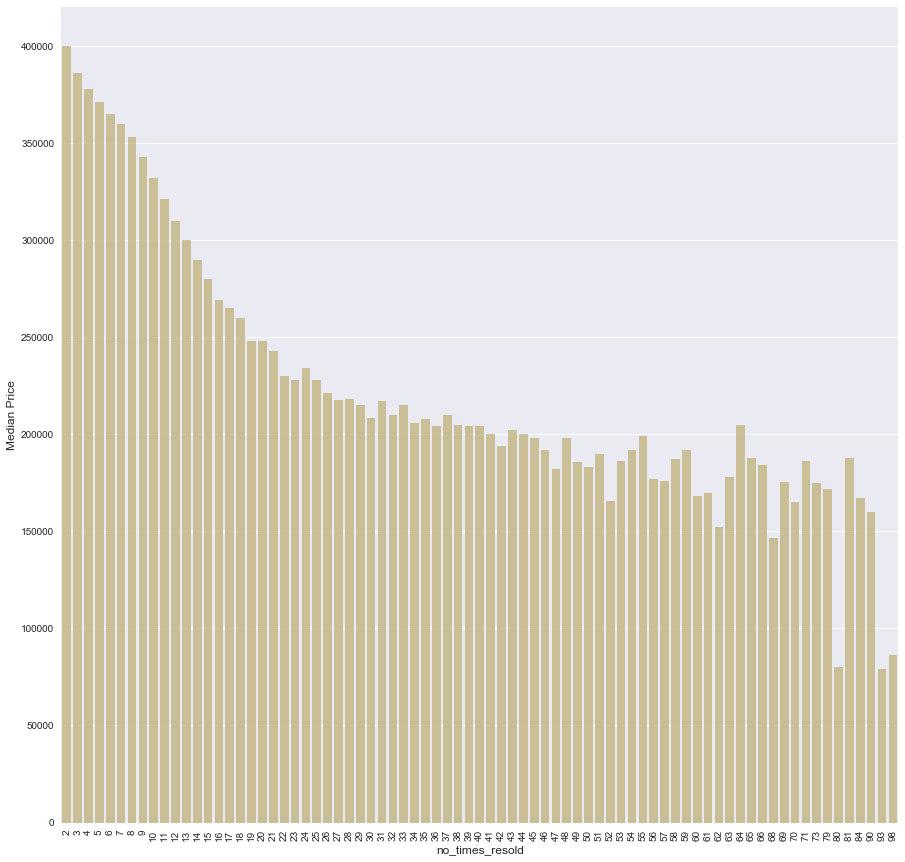

In [26]:
grouped_df = new_df.groupby('no_times_resold')['resale_price'].aggregate(np.median).reset_index()
plt.figure(figsize=(15,15))
sns.barplot(grouped_df.no_times_resold.values, grouped_df.resale_price.values, alpha=0.8, color=color[4])
plt.ylabel('Median Price', fontsize=12)
plt.xlabel('no_times_resold', fontsize=12)
plt.xticks(rotation='vertical')

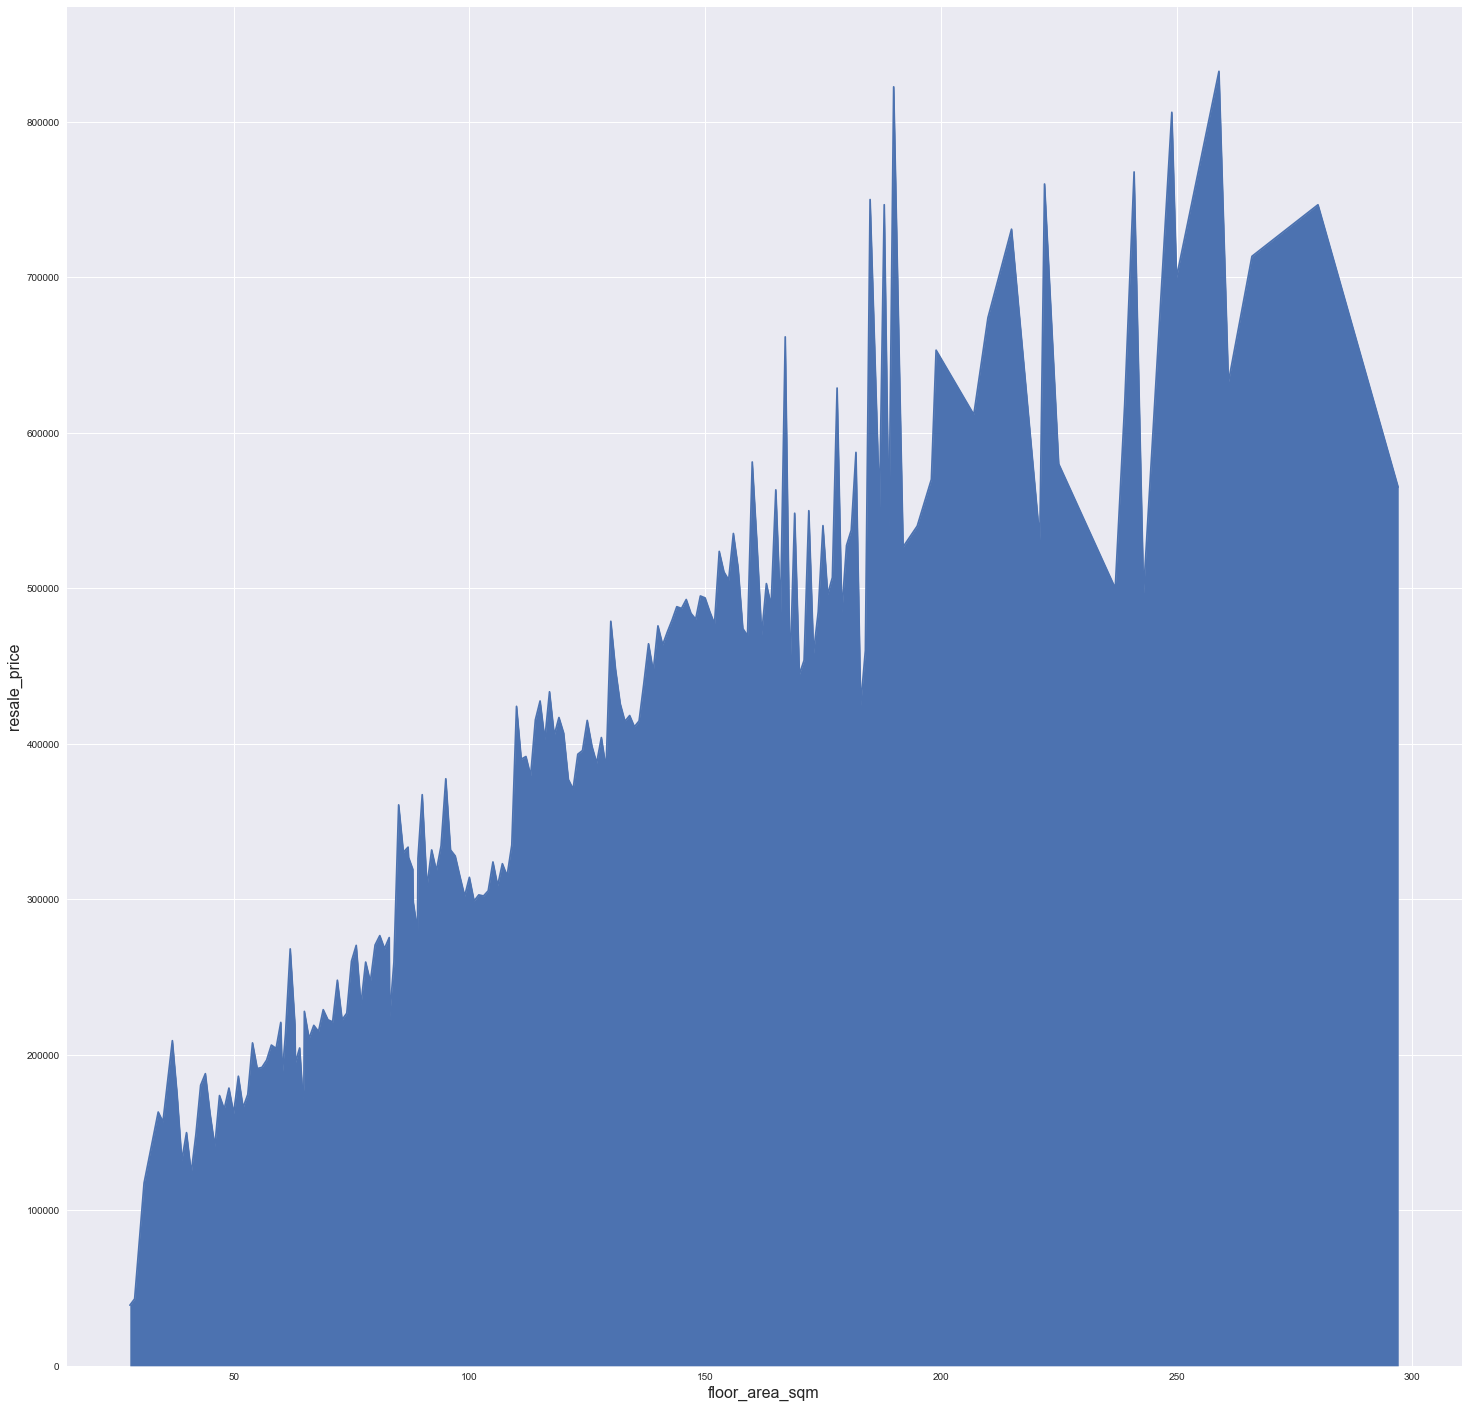

In [27]:
plt.figure(figsize=(25,25))
plt.xlabel('floor_area_sqm', fontsize=16)
plt.ylabel('resale_price', fontsize=16)
new_df.groupby('floor_area_sqm')['resale_price'].mean().plot(kind='area')

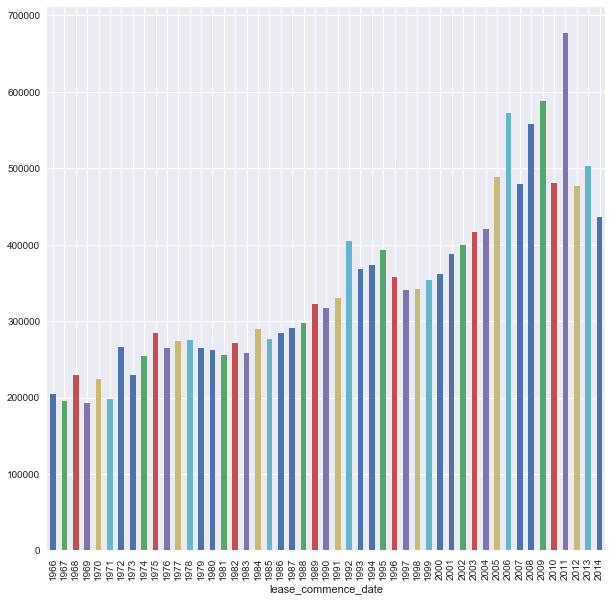

In [28]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=45)
new_df.groupby('lease_commence_date')['resale_price'].mean().plot(kind='bar')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


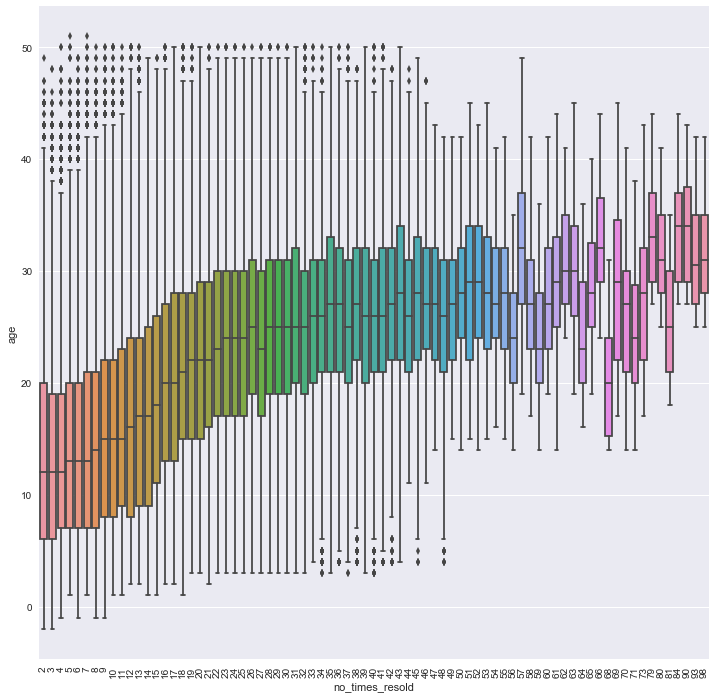

In [29]:
plt.figure(figsize=(12,12))
plt.xticks(rotation = 'vertical')
sns.boxplot(x="no_times_resold", y="age", data=new_df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


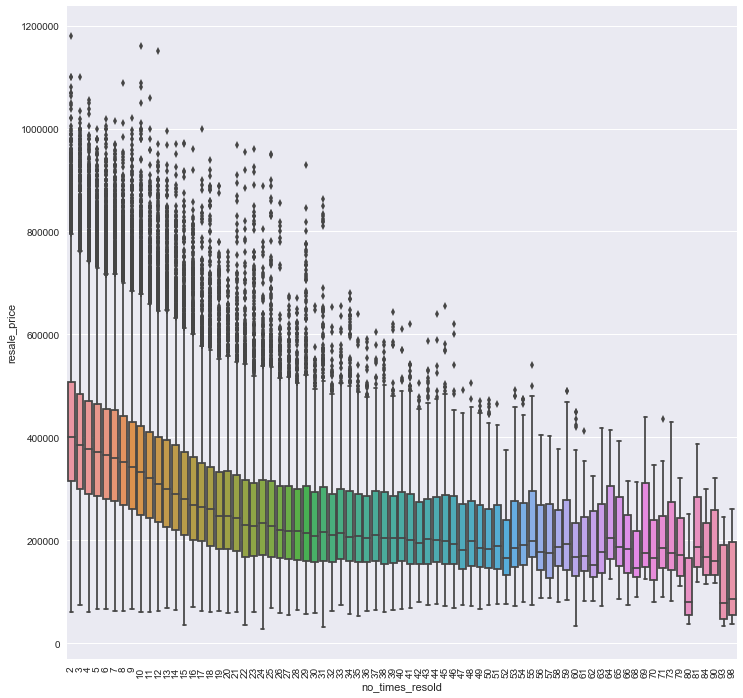

In [30]:
plt.figure(figsize=(12,12))
plt.xticks(rotation = 'vertical')
sns.boxplot(x="no_times_resold", y="resale_price", data=new_df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


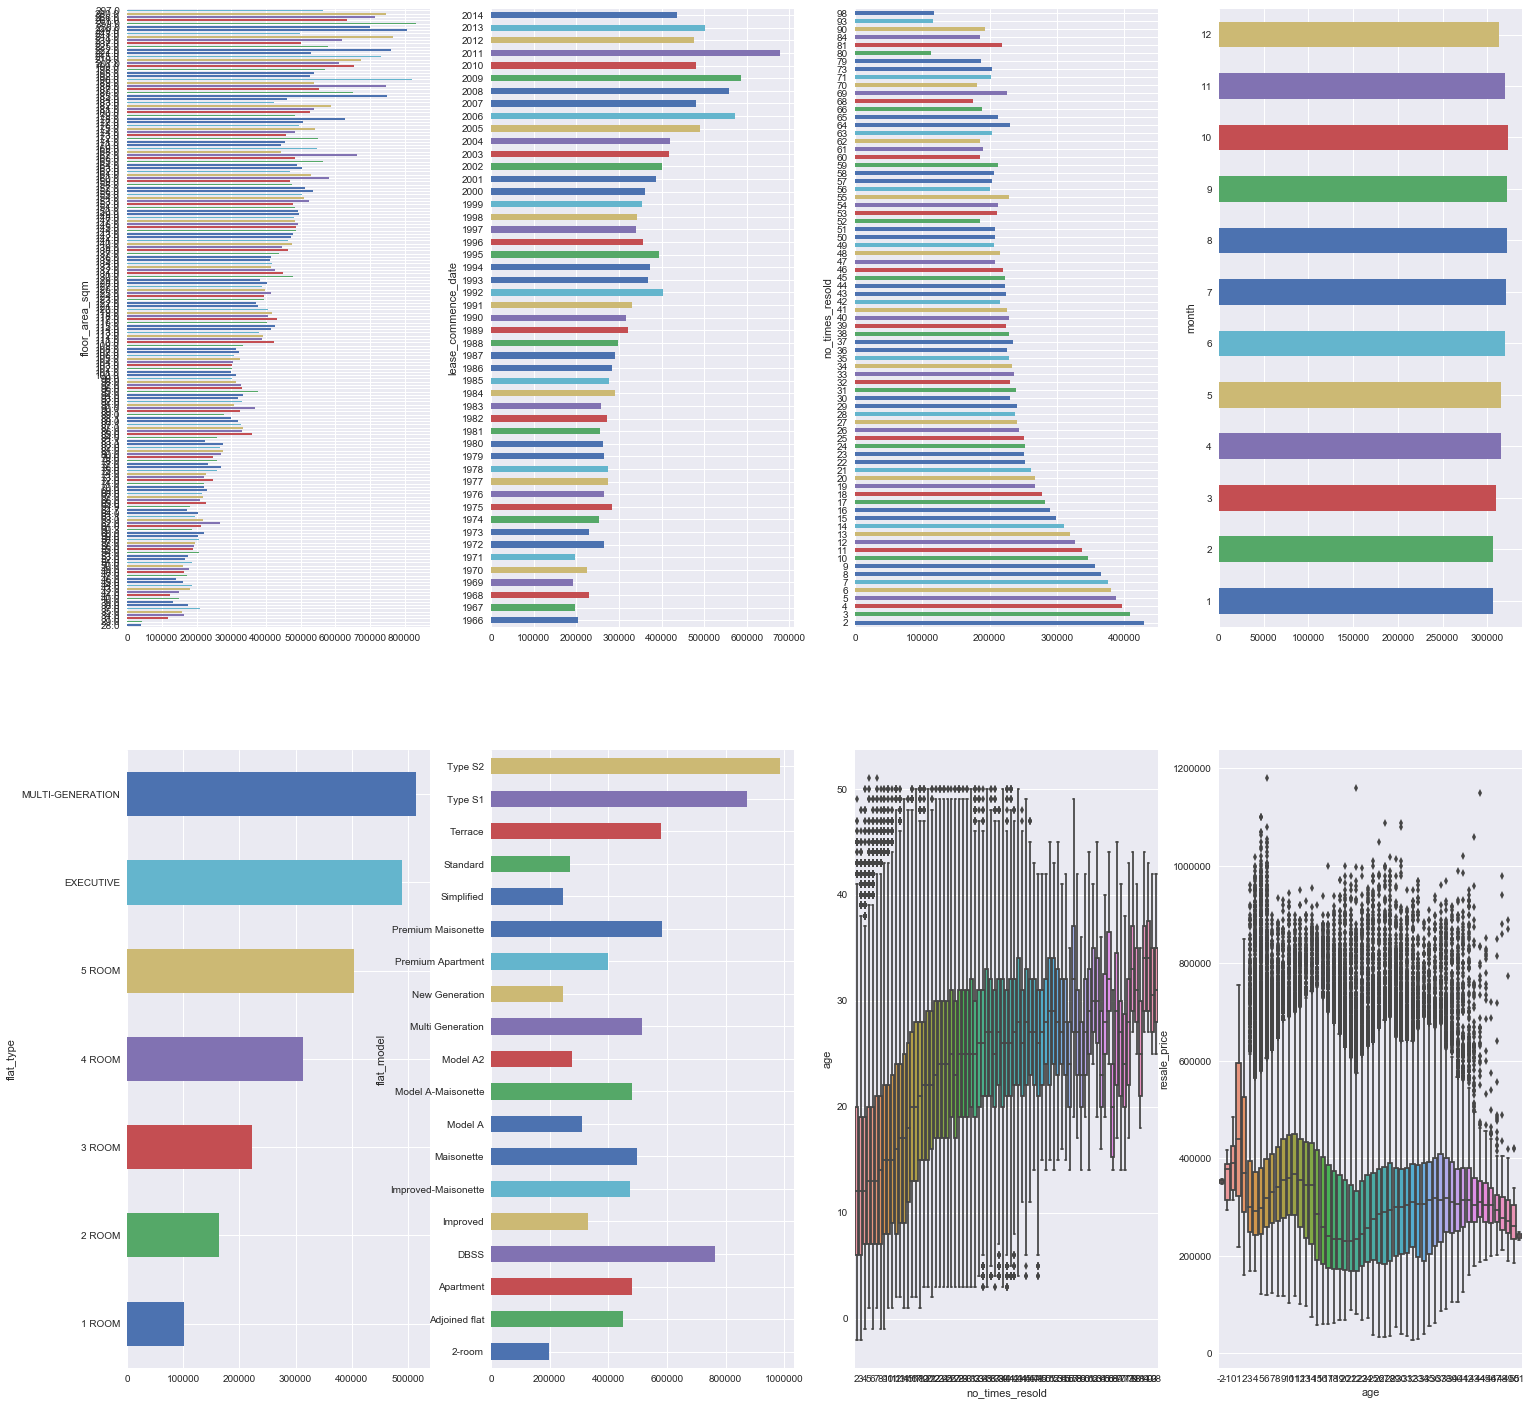

In [39]:
figbi, axesbi = plt.subplots(2, 4, figsize=(25, 25))
new_df.groupby('floor_area_sqm')['resale_price'].mean().plot(kind='barh',ax=axesbi[0,0])
new_df.groupby('lease_commence_date')['resale_price'].mean().plot(kind='barh',ax=axesbi[0,1])
new_df.groupby('no_times_resold')['resale_price'].mean().plot(kind='barh',ax=axesbi[0,2])
new_df.groupby('month')['resale_price'].mean().plot(kind='barh',ax=axesbi[0,3])
new_df.groupby('flat_type')['resale_price'].mean().plot(kind='barh',ax=axesbi[1,0])
new_df.groupby('flat_model')['resale_price'].mean().plot(kind='barh',ax=axesbi[1,1])
sns.boxplot(x="no_times_resold", y="age", data=new_df,ax=axesbi[1,2])
sns.boxplot(x="age", y="resale_price", data=new_df,ax=axesbi[1,3])

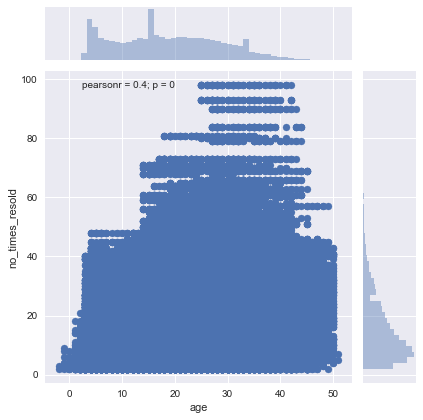

In [43]:
sns.jointplot(x="age", y="no_times_resold", data=new_df);

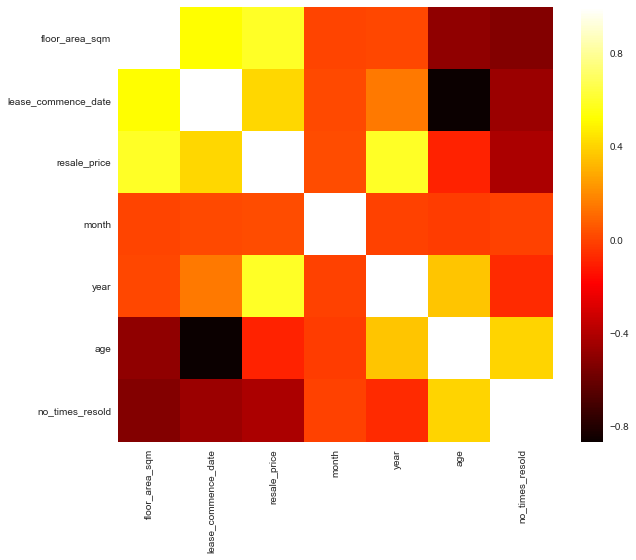

In [45]:
f, ax = plt.subplots(figsize=(10, 8))
corr = new_df.corr()
sns.heatmap(corr,
            mask=np.zeros_like(corr, dtype=np.bool), 
            cmap='hot',
            square=True, ax=ax)
#resaleprice and no_times_resold

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated

Text(0.5,86,'Log of Total area in square metre')

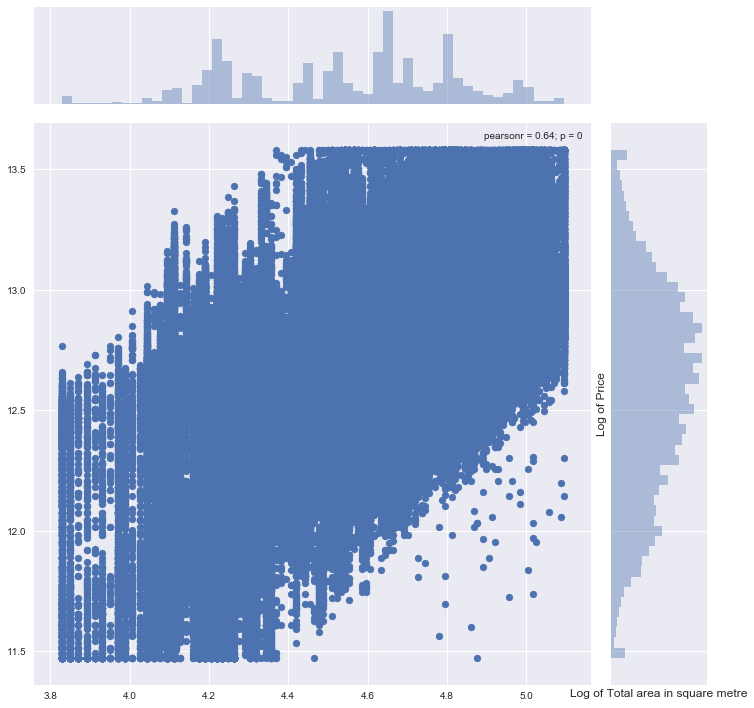

In [47]:
ulimit = np.percentile(new_df.resale_price.values, 99.5)
llimit = np.percentile(new_df.resale_price.values, 0.5)
new_df['resale_price'].ix[new_df['resale_price']>ulimit] = ulimit
new_df['resale_price'].ix[new_df['resale_price']<llimit] = llimit

col = "floor_area_sqm"
ulimit = np.percentile(new_df[col].values, 99.5)
llimit = np.percentile(new_df[col].values, 0.5)
new_df[col].ix[new_df[col]>ulimit] = ulimit
new_df[col].ix[new_df[col]<llimit] = llimit

plt.figure(figsize=(12,12))
sns.jointplot(x=np.log1p(new_df.floor_area_sqm.values), y=np.log1p(new_df.resale_price.values), size=10)
plt.ylabel('Log of Price', fontsize=12)
plt.xlabel('Log of Total area in square metre', fontsize=12)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text xticklabel objects>)

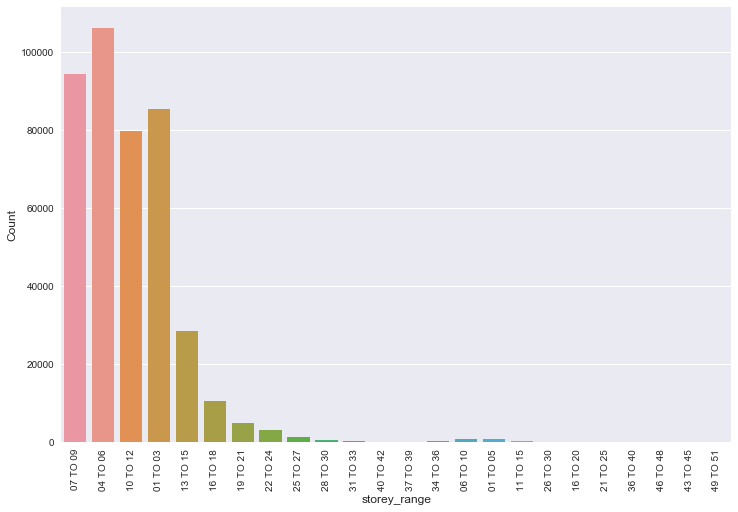

In [48]:
plt.figure(figsize=(12,8))
sns.countplot(x="storey_range", data=new_df)
plt.ylabel('Count', fontsize=12)
plt.xlabel('storey_range', fontsize=12)
plt.xticks(rotation='vertical')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


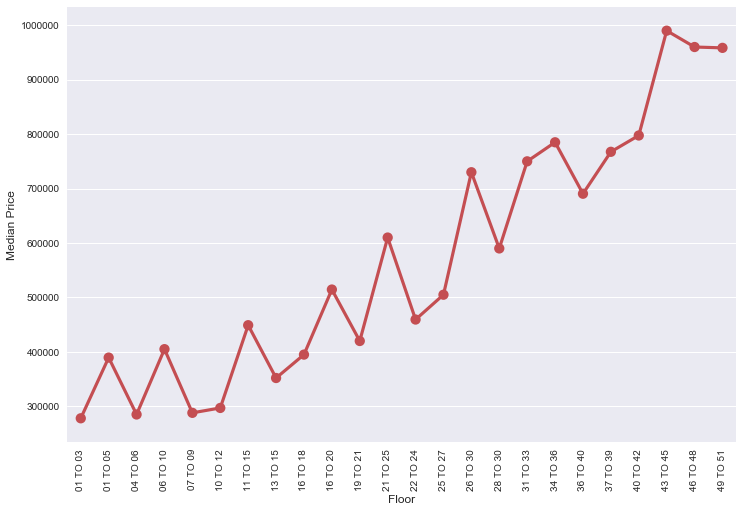

In [22]:
grouped_df = new_df.groupby('storey_range')['resale_price'].aggregate(np.median).reset_index()
plt.figure(figsize=(12,8))
sns.pointplot(grouped_df.storey_range.values, grouped_df.resale_price.values, alpha=0.8, color=color[2])
plt.ylabel('Median Price', fontsize=12)
plt.xlabel('Floor', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


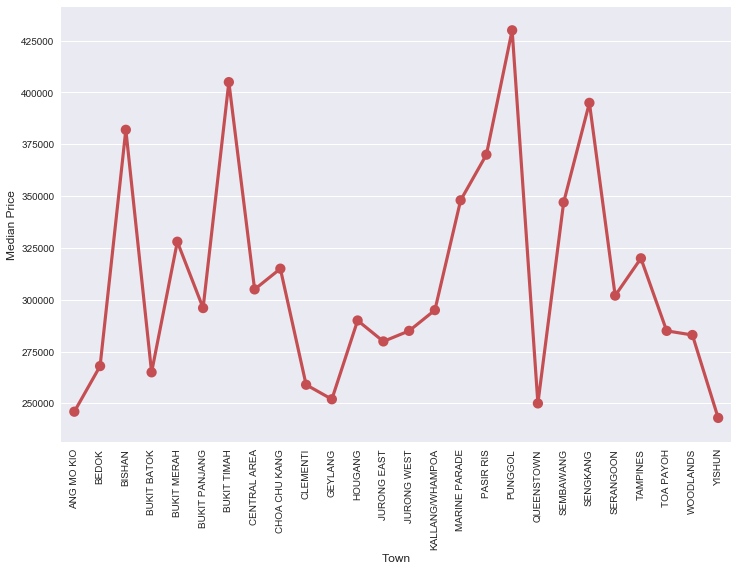

In [24]:
grouped_df = new_df.groupby('town')['resale_price'].aggregate(np.median).reset_index()
plt.figure(figsize=(12,8))
sns.pointplot(grouped_df.town.values, grouped_df.resale_price.values, alpha=0.8, color=color[2])
plt.ylabel('Median Price', fontsize=12)
plt.xlabel('Town', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [27]:
new_df.columns

Index(['town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'building_id', 'month', 'year', 'age', 'no_times_resold'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


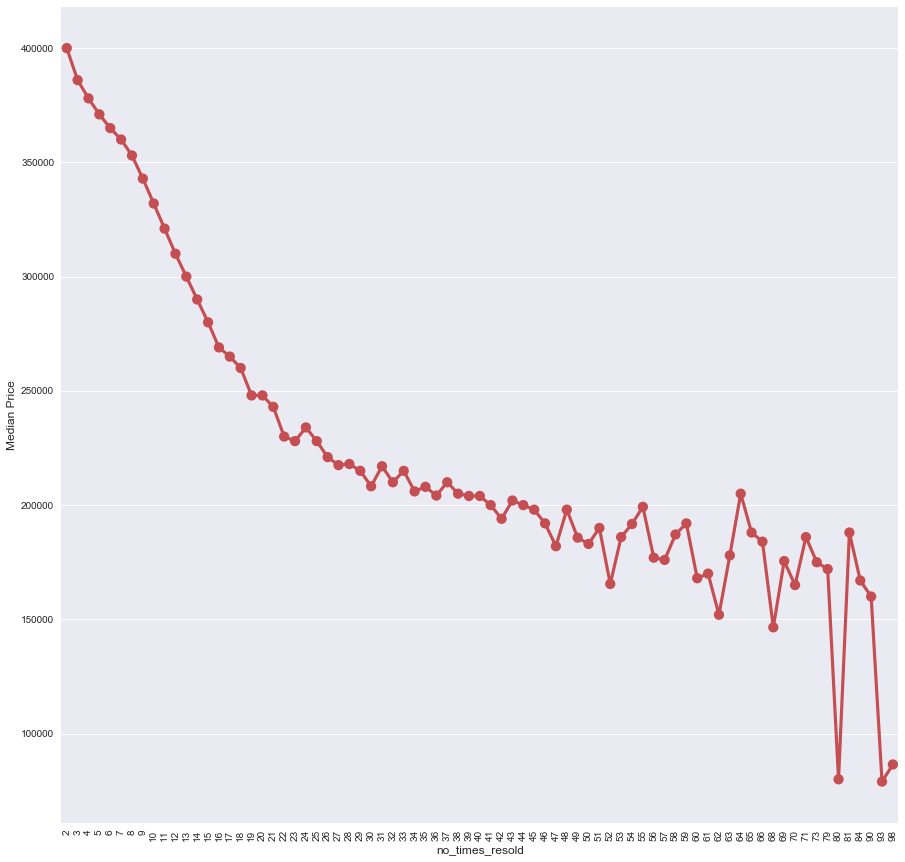

In [37]:
grouped_df = new_df.groupby('no_times_resold')['resale_price'].aggregate(np.median).reset_index()
plt.figure(figsize=(15,15))
sns.pointplot(grouped_df.no_times_resold.values, grouped_df.resale_price.values, alpha=0.8, color=color[2])
plt.ylabel('Median Price', fontsize=12)
plt.xlabel('no_times_resold', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


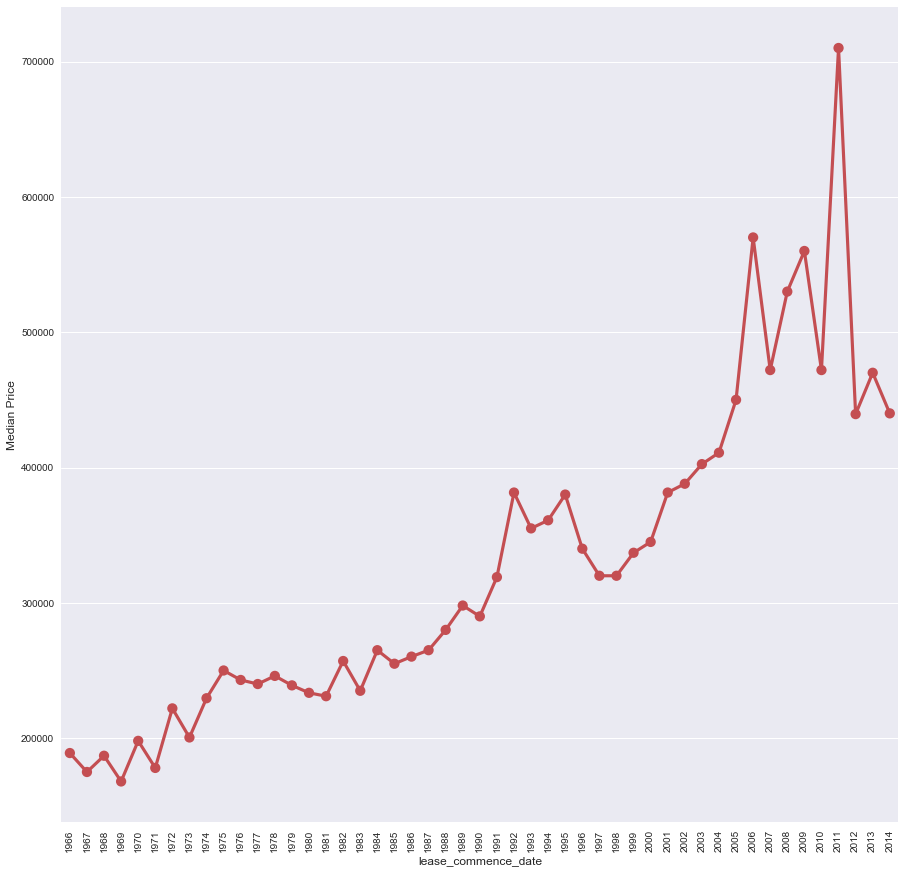

In [32]:
grouped_df = new_df.groupby('lease_commence_date')['resale_price'].aggregate(np.median).reset_index()
plt.figure(figsize=(15,15))
sns.pointplot(grouped_df.lease_commence_date.values, grouped_df.resale_price.values, alpha=0.8, color=color[2])
plt.ylabel('Median Price', fontsize=12)
plt.xlabel('lease_commence_date', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


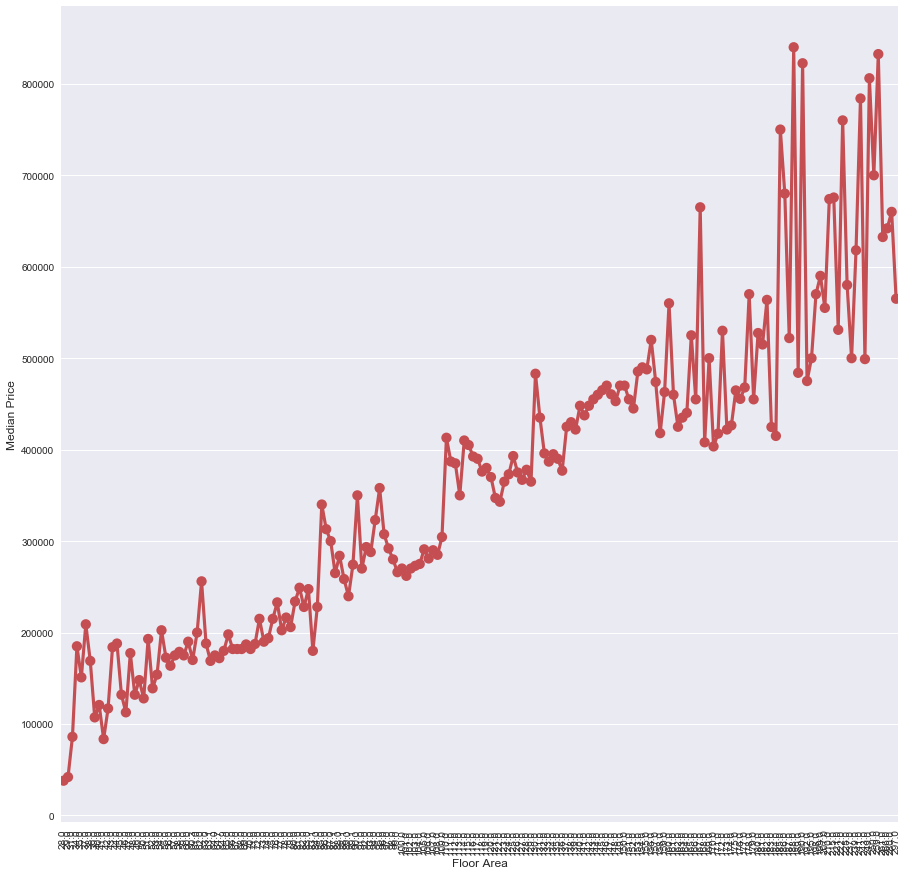

In [31]:
grouped_df = new_df.groupby('floor_area_sqm')['resale_price'].aggregate(np.median).reset_index()
plt.figure(figsize=(15,15))
sns.pointplot(grouped_df.floor_area_sqm.values, grouped_df.resale_price.values, alpha=0.8, color=color[2])
plt.ylabel('Median Price', fontsize=12)
plt.xlabel('Floor Area', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


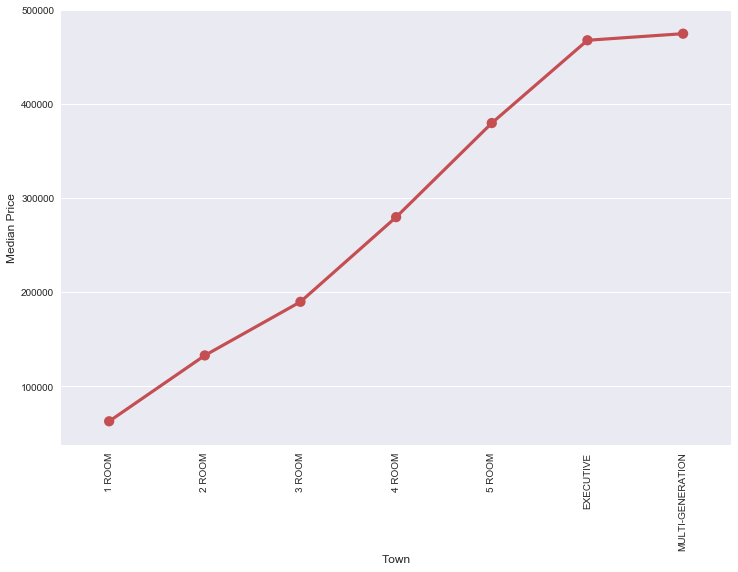

In [28]:
grouped_df = new_df.groupby('flat_type')['resale_price'].aggregate(np.median).reset_index()
plt.figure(figsize=(12,8))
sns.pointplot(grouped_df.flat_type.values, grouped_df.resale_price.values, alpha=0.8, color=color[2])
plt.ylabel('Median Price', fontsize=12)
plt.xlabel('Town', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()